In [1]:
import jax.numpy as jnp
import jax
import matplotlib.pyplot as plt

from src.sdes import sde_utils, time, sde_kunita
from src import data_boundary_pts

from experiments.plotting import load_checkpoint_w_batch_stats, load_checkpoint_wo_batch_stats, checkpoint_unet

Setup to load in checkpoint

In [2]:
T = 1.0
N = 100

In [3]:
num_landmarks = 200

# checkpoint_path_corr = f"../../checkpoints/kunita/circ_r1_lms_{num_landmarks}_corr"
checkpoint_path = f"../../checkpoints/kunita/circ_r1_lms_{num_landmarks}"
# checkpoint_path = f"../../checkpoints/kunita/fixed_x0_lms_5"
trained_score, restored = checkpoint_unet(checkpoint_path)
# trained_score_corr, restored_corr = checkpoint_unet(checkpoint_path_corr)
print(restored['train_time'])

0.0008150463409999702


In [4]:
keys = jax.random.split(jax.random.PRNGKey(0), 10)
ts = time.grid(0, T, N)

target = restored['sde']['y']
target = target.reshape(-1, 2)

x0 = data_boundary_pts.sample_circle(num_landmarks, 0.5)

drift, diffusion = sde_kunita.vector_fields()
bm_shape = (sde_kunita.GRID_SIZE**2 * 2,)

conditioned_trajs = jax.vmap(sde_utils.conditioned, (0, None, None, None, None, None, None))(keys, ts, x0, trained_score, drift, diffusion, bm_shape)

# conditioned_trajs_corr = jax.vmap(sde_utils.conditioned, (0, None, None, None, None, None, None))(keys, ts, x0, trained_score_corr, drift, diffusion, bm_shape)

forward_trajs = jax.vmap(sde_utils.solution, (0, None, None, None, None, None))(keys, ts, x0, drift, diffusion, bm_shape)


# conditioned_traj = sde_utils.conditioned(key, ts, x0, trained_score, drift, diffusion, bm_shape)
# forward_traj = sde_utils.solution(key, ts, x0, drift, diffusion, bm_shape)

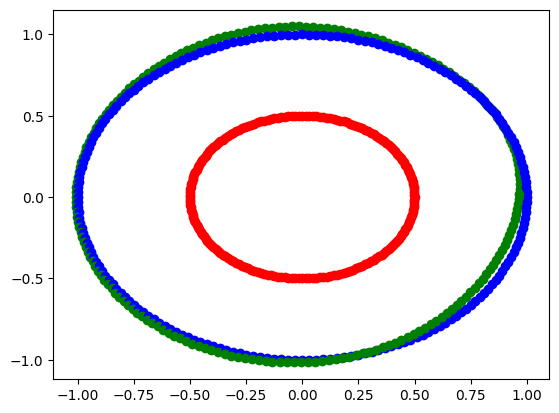

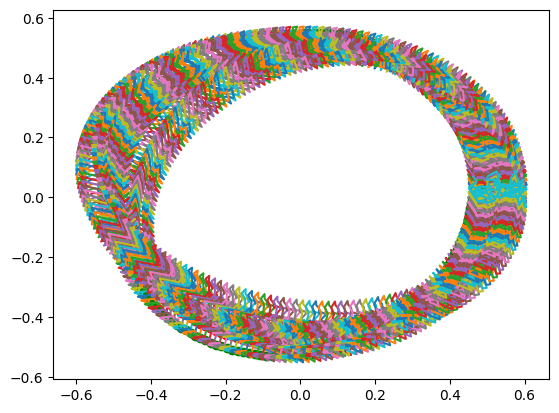

In [5]:
traj = 1
conditioned_traj = conditioned_trajs[traj].reshape(-1, num_landmarks, 2)

for landmark in range(conditioned_traj.shape[1]):
    # plt.plot(conditioned_traj[:, landmark, 0], conditioned_traj[:, landmark, 1])
    plt.scatter(conditioned_traj[0, landmark, 0], conditioned_traj[0, landmark, 1], c='red')
    plt.scatter(conditioned_traj[-1, landmark, 0], conditioned_traj[-1, landmark, 1], c='green')
    plt.scatter(target[landmark, 0], target[landmark, 1], c='blue')
plt.show()

# conditioned_traj_corr = conditioned_trajs_corr[traj].reshape(-1, num_landmarks, 2)

# for landmark in range(conditioned_traj_corr.shape[1]):
#     plt.plot(conditioned_traj_corr[:, landmark, 0], conditioned_traj_corr[:, landmark, 1])
#     plt.scatter(conditioned_traj_corr[0, landmark, 0], conditioned_traj_corr[0, landmark, 1], c='red')
#     plt.scatter(conditioned_traj_corr[-1, landmark, 0], conditioned_traj_corr[-1, landmark, 1], c='green')
#     plt.scatter(target[landmark, 0], target[landmark, 1], c='blue')
# plt.show()

forward_traj = forward_trajs[traj].reshape(-1, num_landmarks, 2)

for landmark in range(forward_traj.shape[1]):
    plt.plot(forward_traj[:, landmark, 0], forward_traj[:, landmark, 1])
    plt.scatter(forward_traj[0, landmark, 0], forward_traj[0, landmark, 1], c='red')
    plt.scatter(forward_traj[-1, landmark, 0], forward_traj[-1, landmark, 1], c='green')
plt.show()

In [6]:
target_flat = target.reshape((num_landmarks*2))

conditioned_trajs_error = jnp.linalg.norm(conditioned_trajs[:, -1] - target_flat)
# conditioned_trajs_corr_error = jnp.linalg.norm(conditioned_trajs_corr[:, -1] - target)
forward_trajs_error = jnp.linalg.norm(forward_trajs[:, -1] - target_flat)

print(conditioned_trajs_error)
print(forward_trajs_error)

1.7894775
23.573862


Results from emoji experiment

In [7]:
import jax.numpy as jnp
import jax

from src.sdes import sde_utils, time, sde_kunita
from src import data_boundary_pts

from experiments.plotting import checkpoint_unet

checkpoint_path_emoji = f"../../checkpoints/kunita/emoji_morphed"

trained_score_emoji, restored_emoji = checkpoint_unet(checkpoint_path_emoji)

keys = jax.random.split(jax.random.PRNGKey(0), 10)
ts = time.grid(0, 1.0, 100)

num_landmarks = 90

target = restored_emoji['sde']['y']
target = target.reshape(-1, 2)

target_emoji_fns = data_boundary_pts.pensive_face_fns(10, 10, 10, 40)
x0 = data_boundary_pts.flattened_array_from_faces(target_emoji_fns)

drift, diffusion = sde_kunita.vector_fields()
bm_shape = (sde_kunita.GRID_SIZE**2 * 2,)

conditioned_trajs = jax.vmap(sde_utils.conditioned, (0, None, None, None, None, None, None))(keys, ts, x0, trained_score_emoji, drift, diffusion, bm_shape)


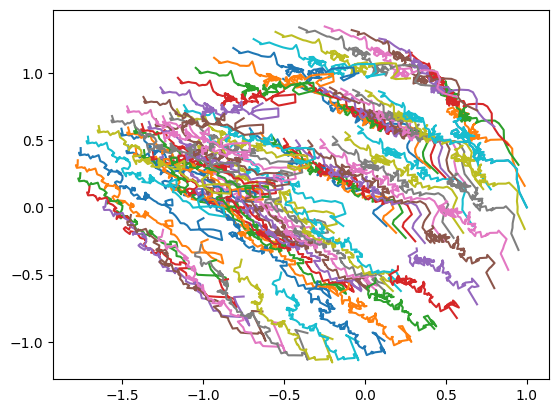

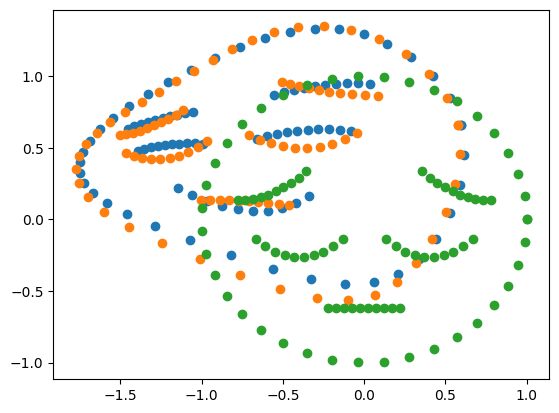

In [8]:
import matplotlib.pyplot as plt

traj = 1
conditioned_traj = conditioned_trajs[traj].reshape(-1, num_landmarks, 2)

for landmark in range(conditioned_traj.shape[1]):
    plt.plot(conditioned_traj[:, landmark, 0], conditioned_traj[:, landmark, 1])
plt.show()

plt.scatter(target[:, 0], target[:, 1])
plt.scatter(conditioned_traj[-1, :, 0], conditioned_traj[-1, :, 1])
plt.scatter(conditioned_traj[0, :, 0], conditioned_traj[0, :, 1])
plt.show()